<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-13/blob/main/Reto/Reto_Entrega_1__Limpieza_an%C3%A1lisis_visualizaci%C3%B3n_y_kmeans_JuanSebastianOrtegaBriones_A01794327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

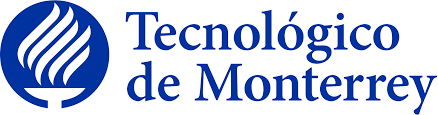

# Reto: Parte 1 Limpieza, análisis, visualización y kmeans
## Ciencia y analítica de datos
### Profesor: María de la Paz Rico Fernández
### Juan Sebastián Ortega Briones A01794327
**16 de Noviembre del 2022**

In [ ]:
!pip3 install geopandas;
!pip3 install qeds;

In [24]:
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import matplotlib.colors as color
from tqdm import tqdm
from shapely.geometry import Point
import qeds
import seaborn as sns
qeds.themes.mpl_style()
%matplotlib inline

In [25]:
qeds.themes.mpl_style()
pd.set_option("display.max_columns", 57)
pd.set_option("display.max_rows", 100)

**Uso de Base de datos de Aguas Subterraneas**

In [55]:
df=pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-13/main/Reto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding = 'ISO-8859-1')  #Importa datos de Aguas subterraneas

In [56]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [57]:
df.shape

(1068, 57)

# Limpieza de datos

In [58]:
#Array de solo las columnas numericas
datos_numericos=['LATITUD', 'LONGITUD','ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L']

In [59]:
#Remplaza datos numericos que incluyen el simbolo < por 0
df.replace(to_replace=r'[<]\w+', value=0, regex=True, inplace=True)

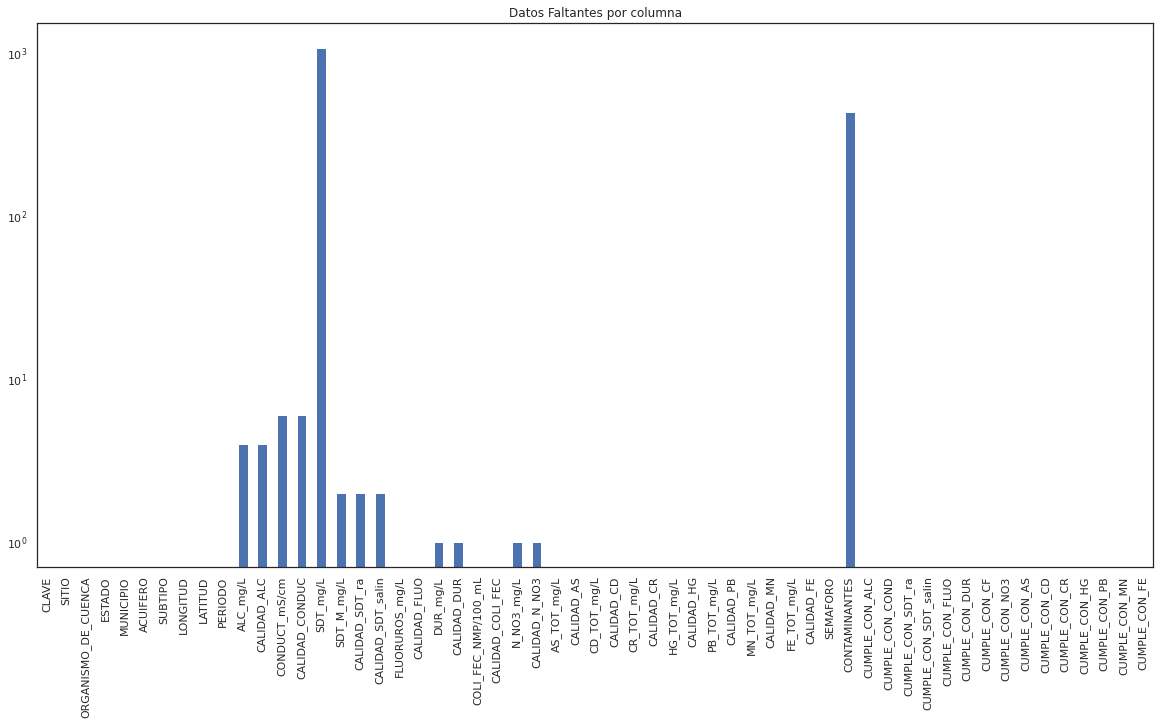

In [60]:
#Cuantas filas contienen NaN por columna
plt.figure(figsize=(20, 10))
ax=df.isna().sum().plot.bar(logy=True).set_title('Datos Faltantes por columna')
plt.show()

In [61]:
#La columna SDT_mg/L no contiene datos será eliminada
df.drop(['SDT_mg/L'], axis=1, inplace=True)


In [63]:
df.shape

(1068, 56)

**Exporación de datos**

In [64]:
#Convierte columnas que contienen datos númericos de tipo objeto a tipo flotante
df[datos_numericos]=df[datos_numericos].astype('float')

In [65]:
df[datos_numericos].describe()

,LATITUD,LONGITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1064.000000,1062.000000,1066.000000,1068.000000,1067.000000,1068.000000,1067.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,23.163618,-101.891007,235.633759,1138.953013,896.078115,1.045263,347.450725,354.731273,4.318540,0.011987,0.000035,0.009277,0.000104,0.000422,0.071713,0.401001
std,3.887670,6.703263,116.874291,1245.563674,2751.538128,1.939375,360.127162,2052.588264,8.345763,0.037480,0.000997,0.154619,0.000540,0.003743,0.376658,5.538641
min,14.561150,-116.664250,26.640000,50.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.212055,-105.388865,164.000000,501.750000,337.500000,0.267175,121.194800,0.000000,0.650294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.617190,-102.174180,215.527500,815.000000,550.400000,0.503500,245.335800,0.000000,2.080932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046960
75%,25.510285,-98.974716,292.710000,1322.750000,916.100000,1.139850,453.930000,13.250000,5.201698,0.000000,0.000000,0.000000,0.000000,0.000000,0.009947,0.173380
max,32.677713,-86.864120,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   float64
 15  CALIDAD_SDT_ra       

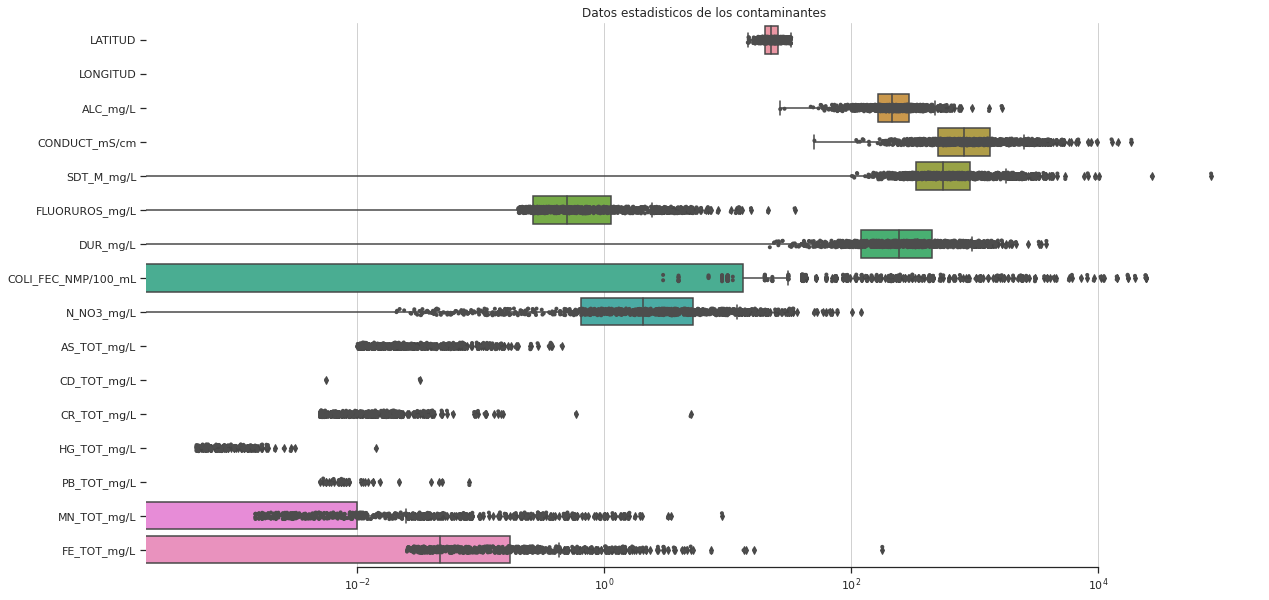

In [67]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(20, 10))
ax.set_xscale("log")

sns.boxplot(data=df[datos_numericos],orient='h').set(title='Datos estadisticos de los contaminantes')
sns.stripplot(data=df[datos_numericos],size=4, color=".3", linewidth=0, orient='h')
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.show()

# Correlación entre contaminantes de Aguas Subterraneas

In [68]:
corr=df[datos_numericos].corr()
corr

,LATITUD,LONGITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
LATITUD,1.000000,-0.760204,-0.080026,0.053786,0.059881,0.140579,0.084626,0.063152,0.148279,0.111556,-0.052289,-0.060092,-0.141567,-0.073510,-0.036325,-0.042002
LONGITUD,-0.760204,1.000000,0.167234,0.061118,-0.013923,-0.133322,0.088529,-0.084477,-0.107561,-0.097533,0.043521,0.058767,0.049549,0.013652,-0.036189,0.022395
ALC_mg/L,-0.080026,0.167234,1.000000,0.232003,0.079350,0.068982,0.242484,-0.016441,-0.000442,0.072592,0.030589,-0.014136,0.076929,0.023182,0.130074,0.043638
CONDUCT_mS/cm,0.053786,0.061118,0.232003,1.000000,0.286562,-0.023772,0.692690,0.017829,0.219482,-0.008690,0.027178,0.004159,0.048255,0.026432,0.096223,0.083540
SDT_M_mg/L,0.059881,-0.013923,0.079350,0.286562,1.000000,-0.012557,0.346973,-0.001110,0.101710,-0.013096,0.010109,0.000194,0.037751,0.030445,0.019085,0.020271
FLUORUROS_mg/L,0.140579,-0.133322,0.068982,-0.023772,-0.012557,1.000000,-0.152799,0.002728,-0.018393,0.457398,-0.019101,-0.004505,-0.035890,-0.043398,-0.049016,-0.009864
DUR_mg/L,0.084626,0.088529,0.242484,0.692690,0.346973,-0.152799,1.000000,0.031862,0.301449,-0.121827,0.023733,0.006983,0.066213,-0.011427,0.084150,0.060191
COLI_FEC_NMP/100_mL,0.063152,-0.084477,-0.016441,0.017829,-0.001110,0.002728,0.031862,1.000000,-0.000963,0.033501,0.001762,-0.009335,-0.013002,0.017468,-0.005169,0.003213
N_NO3_mg/L,0.148279,-0.107561,-0.000442,0.219482,0.101710,-0.018393,0.301449,-0.000963,1.000000,-0.001429,-0.010352,-0.015327,-0.001348,-0.019912,-0.037027,0.013107
AS_TOT_mg/L,0.111556,-0.097533,0.072592,-0.008690,-0.013096,0.457398,-0.121827,0.033501,-0.001429,1.000000,-0.011335,-0.012069,-0.025514,-0.029946,0.018330,0.012053


### Correlaciones más grandes

In [69]:
df[datos_numericos].corr().unstack().sort_values().drop_duplicates().head(10)

LATITUD              LONGITUD      -0.760204
FLUORUROS_mg/L       DUR_mg/L      -0.152799
HG_TOT_mg/L          LATITUD       -0.141567
FLUORUROS_mg/L       LONGITUD      -0.133322
AS_TOT_mg/L          DUR_mg/L      -0.121827
N_NO3_mg/L           LONGITUD      -0.107561
LONGITUD             AS_TOT_mg/L   -0.097533
COLI_FEC_NMP/100_mL  LONGITUD      -0.084477
ALC_mg/L             LATITUD       -0.080026
PB_TOT_mg/L          LATITUD       -0.073510
dtype: float64

Text(0.5, 1.0, 'Correlaciones de los datos')

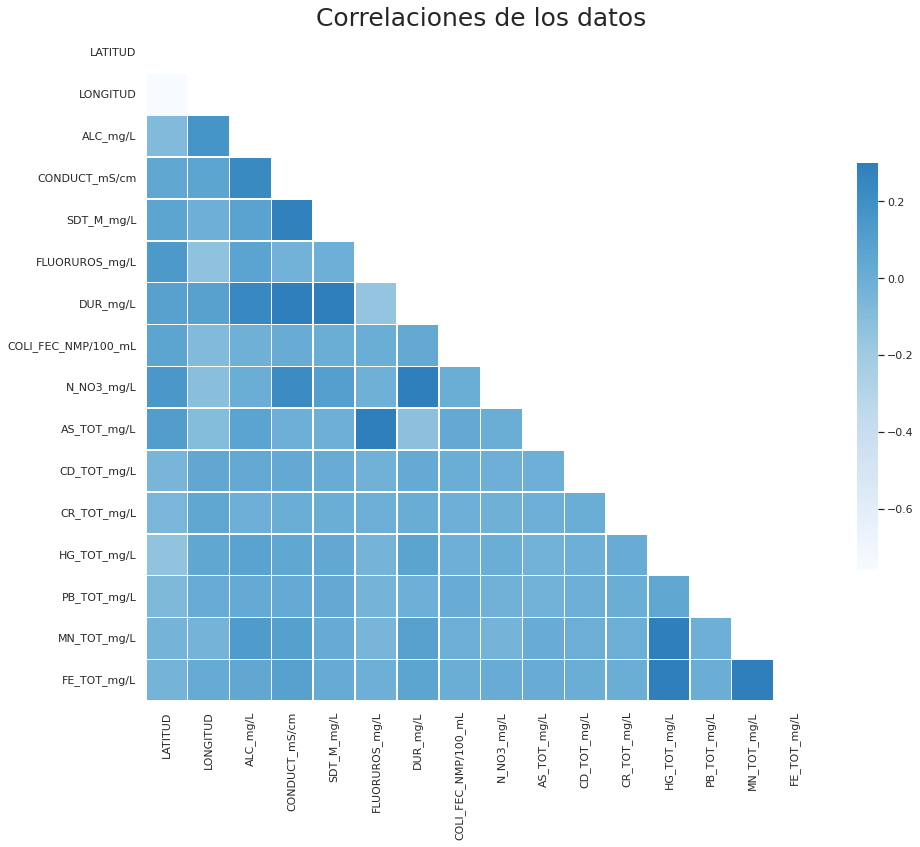

In [302]:
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  cmap='Blues',  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlaciones de los datos', fontsize = 25)


# Kmeans

In [71]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [73]:
clusters=10
wcss=[]

for i in range(1,clusters):
  kmeans=KMeans(n_clusters=i, max_iter=3000)
  kmeans.fit(df[['LATITUD', 'LONGITUD']])
  wcss.append(kmeans.inertia_)


In [43]:
len(wcss)

19

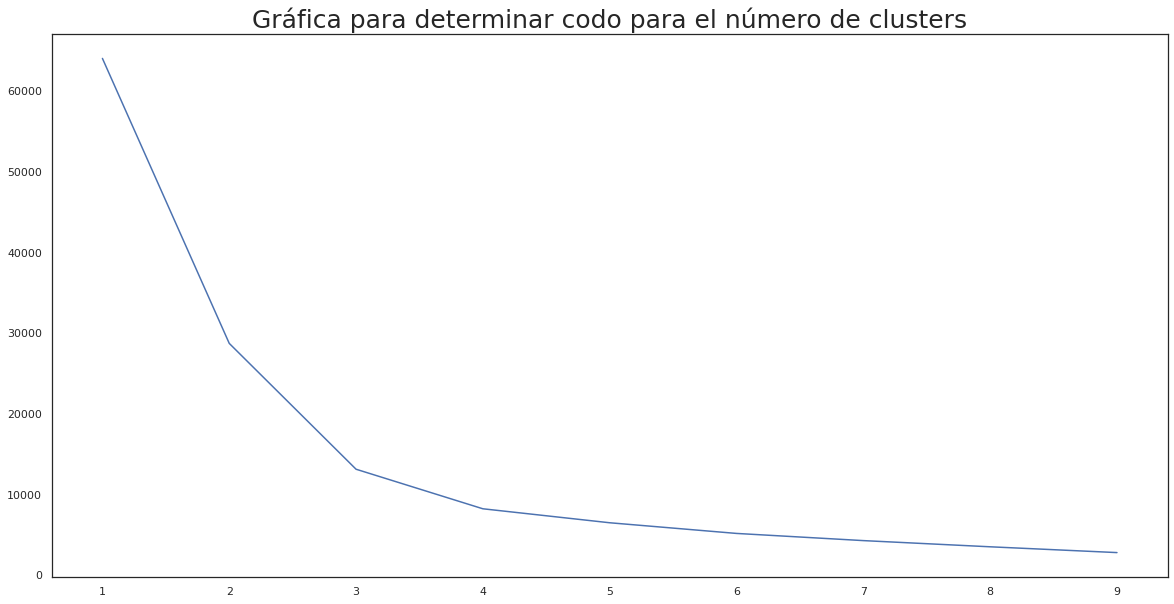

In [303]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10))
plt.plot(range(1,clusters), wcss)
plt.title('Gráfica para determinar codo para el número de clusters', fontsize = 25)
plt.show()

In [307]:
df["COORDENADAS"] = list(zip(df.LONGITUD, df.LATITUD))   # Se crea la columna de cooredeandas para poder graficar
df["COORDENADAS"] = df["COORDENADAS"].apply(Point)        # Se convierte a objeto point para que lo use geopandas

In [308]:
gdf = gpd.GeoDataFrame(df, geometry="COORDENADAS")
gdf[['LATITUD','LONGITUD', 'COORDENADAS']].head()

,LATITUD,LONGITUD,COORDENADAS
0,22.20887,-102.02210,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.24480 23.45138)


In [309]:
k = 30     # Para tratar de agrupar en zonas pequeñas que traten de asemejarse al semáforo estoy usando una k muy alta
kmeans = KMeans(n_clusters=k, max_iter=300)
y_pred = kmeans.fit(gdf[['LATITUD', 'LONGITUD']])
y_pred.labels_


array([ 0,  0,  0, ...,  7,  7, 28], dtype=int32)

In [215]:
df.shape, y_pred.labels_.shape

((1068, 59), (1068,))

In [310]:
gdf['y']=y_pred.labels_
gdf[['CLAVE', 'COORDENADAS', 'SEMAFORO', 'y']].head(5)

,CLAVE,COORDENADAS,SEMAFORO,y
0,DLAGU6,POINT (-102.02210 22.20887),Verde,0
1,DLAGU6516,POINT (-102.20075 21.99958),Verde,0
2,DLAGU7,POINT (-102.28801 22.36685),Rojo,0
3,DLAGU9,POINT (-102.29449 22.18435),Verde,0
4,DLBAJ107,POINT (-110.24480 23.45138),Rojo,9


In [217]:
gdf.to_excel("salida.xls")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


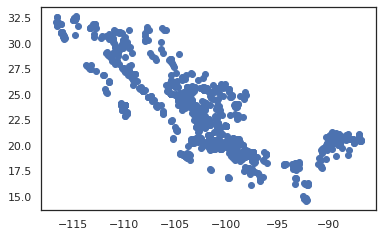

In [311]:
gdf.plot()

In [312]:
cmap=color.ListedColormap(["darkred", "gold", "lawngreen"])



In [313]:
categorias=gdf['SEMAFORO'].unique()
categorias

array(['Verde', 'Rojo', 'Amarillo'], dtype=object)

In [314]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

#world.head()

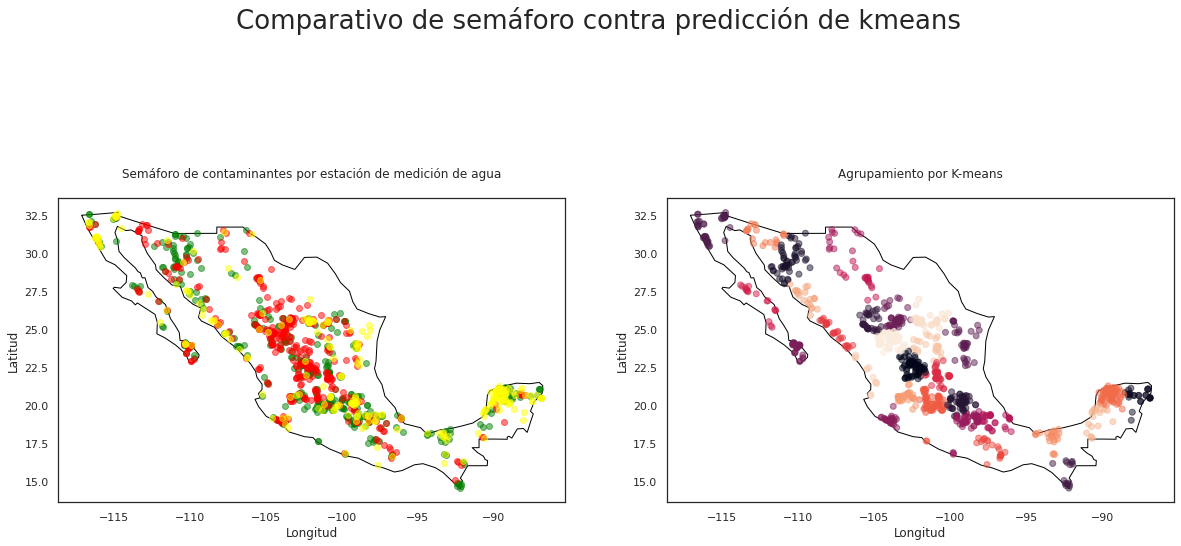

In [315]:

fig, gax = plt.subplots(1,2,figsize=(20,10))

world.query("name == 'Mexico'").plot(ax = gax[0], edgecolor='black', color='white')
world.query("name == 'Mexico'").plot(ax = gax[1], edgecolor='black', color='white')

gdf[gdf['SEMAFORO']==categorias[0]].plot(ax=gax[0],color='green' ,alpha = 0.5)
gdf[gdf['SEMAFORO']==categorias[1]].plot(ax=gax[0],color='red' ,alpha = 0.5)
gdf[gdf['SEMAFORO']==categorias[2]].plot(ax=gax[0],color='yellow' ,alpha = 0.5)

gax[0].set_xlabel('Longitud')
gax[0].set_ylabel('Latitud')
gax[0].set_title('Semáforo de contaminantes por estación de medición de agua\n')

gdf.plot(ax=gax[1],column='y' ,alpha = 0.5)

gax[1].set_xlabel('Longitud')
gax[1].set_ylabel('Latitud')
gax[1].set_title('Agrupamiento por K-means\n')

fig.suptitle('Comparativo de semáforo contra predicción de kmeans', fontsize=26)

plt.show()

En caso de usar 3 clusters para kmeans, podemos comparar directamente contra el semáforo 

In [273]:
k = 3
kmeans = KMeans(n_clusters=k, max_iter=100000)
y_pred = kmeans.fit(gdf[['LATITUD', 'LONGITUD']])
y_pred.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [274]:
gdf['y']=y_pred.labels_
gdf[['CLAVE', 'COORDENADAS', 'SEMAFORO', 'y']].head(5)

,CLAVE,CORDENADAS,SEMAFORO,y
0,DLAGU6,POINT (-102.02210 22.20887),Verde,0
1,DLAGU6516,POINT (-102.20075 21.99958),Verde,0
2,DLAGU7,POINT (-102.28801 22.36685),Rojo,0
3,DLAGU9,POINT (-102.29449 22.18435),Verde,0
4,DLBAJ107,POINT (-110.24480 23.45138),Rojo,2


In [276]:
categorias

array(['Verde', 'Rojo', 'Amarillo'], dtype=object)

In [277]:
#Cambia la columna del semaforo de un string a un numero para poder comparar con kameans
gdf['SEMAFORO_CAT']=gdf['SEMAFORO'].apply(lambda x: categorias.tolist().index(x))

In [297]:
gdf[['SEMAFORO_CAT', 'y']].head()


,SEMAFORO_CAT,y
0,0,0
1,0,0
2,1,0
3,0,0
4,1,2


In [279]:
iguales=0
diferentes=0

for n in range(gdf.shape[0]):
 if gdf[['SEMAFORO_CAT']].iloc[n].values.tolist()[0]== gdf[['y']].iloc[n].values.tolist()[0]:
    iguales+=1
print("Son iguales: ", iguales)
print("Porcentaje: ", iguales/gdf.shape[0]*100,'%')

Son iguales:  335
Porcentaje:  31.367041198501873 %
